In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
pd.set_option('display.max_columns',None)

In [57]:
df_train = pd.read_csv('EDA_cleaned_file.csv')
df_train.head()

,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Age,AgeJ,gapgrad,Max_score
0,420000,senior quality engineer,Bangalore,f,84.30,State,2007,95.8,State,2,B.Tech/B.E.,Computer Science Department,78.00,0,Andhra Pradesh,2011,515,585,525,63.597876,0.9737,0.8128,0.5269,1.35490,-0.4455,4.0,25.0,22.0,1,445.0
1,500000,assistant manager,Indore,m,85.40,CBSE,2007,85.0,CBSE,2,B.Tech/B.E.,Electronics and Communication Engineering Depa...,70.06,0,Madhya Pradesh,2012,695,610,780,96.060325,-0.7335,0.3789,1.2396,-0.10760,0.8637,2.0,25.0,24.0,1,466.0
2,325000,systems engineer,Chennai,f,85.00,CBSE,2010,68.2,CBSE,2,B.Tech/B.E.,Information Technology Department,70.00,0,Uttar Pradesh,2014,615,545,370,45.087658,0.2718,1.7109,0.1637,-0.86820,0.6721,2.0,22.0,22.0,0,395.0
3,200000,get,Manesar,m,78.00,CBSE,2008,76.8,CBSE,2,B.Tech/B.E.,Electronics and Communication Engineering Depa...,73.90,0,Uttar Pradesh,2012,545,625,465,12.450207,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1.0,24.0,23.0,2,233.0
4,300000,system engineer,Hyderabad,m,89.92,State,2010,87.0,State,2,B.Tech/B.E.,Electronics and Communication Engineering Depa...,76.32,0,Karnataka,2014,560,555,620,0.000000,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,2.0,23.0,22.0,0,645.0


In [7]:
df_train.CollegeTier = df_train.CollegeTier.astype(object)
df_train.CollegeCityTier = df_train.CollegeCityTier.astype(object)
df_train['12graduation'] = df_train['12graduation'].astype(object)
df_train['GraduationYear'] = df_train['GraduationYear'].astype(object)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 30 columns):
Salary                   3956 non-null int64
Designation              3956 non-null object
JobCity                  3956 non-null object
Gender                   3956 non-null object
10percentage             3956 non-null float64
10board                  3956 non-null object
12graduation             3956 non-null object
12percentage             3956 non-null float64
12board                  3956 non-null object
CollegeTier              3956 non-null object
Degree                   3956 non-null object
Specialization           3956 non-null object
collegeGPA               3956 non-null float64
CollegeCityTier          3956 non-null object
CollegeState             3956 non-null object
GraduationYear           3956 non-null object
English                  3956 non-null int64
Logical                  3956 non-null int64
Quant                    3956 non-null int64
Domain              

In [193]:
df_train.Salary.max()

930000

In [194]:
df_train.shape

(3956, 30)

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [59]:
for i in ['10board','12board','Degree','Specialization','CollegeState','JobCity','Gender','Designation']:
    df_train[i] = le.fit_transform(df_train[i])

In [60]:
df_train.head()

New_salary = []
for i in df_train.Salary:
    if i >= 600000:
        New_salary.append('High_Salary')
    elif (i < 600000) & (i >= 300000):
        New_salary.append('Medium_Salary')
    else:
        New_salary.append('Low_Salary') 

df_train.Salary = New_salary

df_train.Salary = df_train.Salary.map({'Low_Salary': 0,'Medium_Salary':1,'High_Salary':2}) 

In [61]:
df_train.Salary.value_counts(normalize=True)*100

1    49.241658
0    46.916077
2     3.842265
Name: Salary, dtype: float64

In [13]:
df_train.head()

,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Age,AgeJ,gapgrad,Max_score
0,1,315,14,0,84.30,3,2007,95.8,3,2,0,2,78.00,0,0,2011,515,585,525,63.597876,0.9737,0.8128,0.5269,1.35490,-0.4455,4.0,25.0,22.0,1,445.0
1,1,17,72,1,85.40,0,2007,85.0,0,2,0,4,70.06,0,13,2012,695,610,780,96.060325,-0.7335,0.3789,1.2396,-0.10760,0.8637,2.0,25.0,24.0,1,466.0
2,1,375,39,0,85.00,0,2010,68.2,0,2,0,6,70.00,0,23,2014,615,545,370,45.087658,0.2718,1.7109,0.1637,-0.86820,0.6721,2.0,22.0,22.0,0,395.0
3,0,133,101,1,78.00,0,2008,76.8,0,2,0,4,73.90,0,23,2012,545,625,465,12.450207,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1.0,24.0,23.0,2,233.0
4,1,371,71,1,89.92,3,2010,87.0,3,2,0,4,76.32,0,11,2014,560,555,620,0.000000,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,2.0,23.0,22.0,0,645.0


In [67]:
df_train.Salary.value_counts()

1    1948
0    1856
2     152
Name: Salary, dtype: int64

In [62]:
train = df_train.drop(['Salary'],axis=1)

In [21]:
X = df_train.drop(['Salary'],axis=1)
Y = df_train.Salary

In [166]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Age,AgeJ,gapgrad,Max_score,Designation_.net web developer,Designation_account executive,Designation_account manager,Designation_admin assistant,Designation_administrative coordinator,Designation_administrative support,Designation_aircraft technician,Designation_android developer,Designation_application developer,Designation_application engineer,Designation_apprentice,Designation_ase,Designation_asp.net developer,Designation_assistant administrator,Designation_assistant electrical engineer,Designation_assistant engineer,Designation_assistant manager,Designation_assistant professor,Designation_assistant programmer,Designation_assistant software engineer,Designation_assistant store manager,Designation_assistant system engineer,Designation_assistant system engineer - trainee,Designation_assistant system engineer trainee,Designation_assistant systems engineer,Designation_associate developer,Designation_associate engineer,Designation_associate manager,Designation_associate qa,Designation_associate software developer,Designation_associate software engg,Designation_associate software engineer,Designation_associate system engineer,Designation_associate technical operations,Designation_associate test engineer,Designation_asst. manager,Designation_automation engineer,Designation_branch manager,Designation_bss engineer,Designation_business analyst,Designation_business analyst consultant,Designation_business consultant,Designation_business development executive,Designation_business development manager,Designation_business development managerde,Designation_business intelligence analyst,Designation_business office manager,Designation_business process analyst,Designation_business system analyst,Designation_business systems analyst,Designation_business systems consultant,Designation_business technology analyst,Designation_c# developer,Designation_cad designer,Designation_cad drafter,Designation_catalog associate,Designation_civil engineer,Designation_clerical,Designation_clerical assistant,Designation_client services associate,Designation_cloud engineer,Designation_cnc programmer,Designation_co faculty,Designation_computer faculty,Designation_continuous improvement engineer,Designation_controls engineer,Designation_corporate recruiter,Designation_customer care executive,Designation_customer service,Designation_customer service manager,Designation_customer service representative,Designation_customer support engineer,Designation_data analyst,Designation_data entry operator,Designation_data scientist,Designation_database administrator,Designation_database developer,Designation_db2 dba,Designation_dba,Designation_dcs engineer,Designation_delivery software engineer,Designation_design engineer,Designation_designer,Designation_desktop support analyst,Designation_desktop support engineer,Designation_desktop support technician,Designation_developer,Designation_digital marketing specialist,Designation_documentation specialist,Designation_dotnet developer,Designation_editor,Designation_educator,Designation_electrical controls engineer,Designation_electrical design engineer,Designation_electrical designer,Designation_electrical engineer,Designation_electrical field engineer,Designation_electrical project engineer,Designation_electronic field service engineer,Designation_embedded engineer,Designation_embedded software engineer,Designation_engineer,Designation_engineer trainee,Designation_engineer- customer support,Designation_engineer-hws,Designation_engineering manager,Designation_engineering technician,Designation_enterprise solutions developer,Designation_entry level management trainee,Designation_entry level sales and marketing,Designation_environmental engineer,Designation_etl developer,Designation_executive administrative assistant,Designati

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smt = SMOTE()
X,Y = smt.fit_sample(X,Y)

In [24]:
(np.bincount(Y)/5844)*100

array([33.33333333, 33.33333333, 33.33333333])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [26]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [27]:
X_test, y_test = smt.fit_sample(X_test, y_test)

In [28]:
np.bincount(y_test)

array([624, 624, 624], dtype=int64)

# RandomForest

In [102]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [103]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [104]:
rf = RandomForestClassifier()
parameters = {
    'criterion':['gini','entropy'],
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train,y_train)

print_results(cv)

BEST PARAMS: {'criterion': 'entropy', 'max_depth': 32, 'n_estimators': 250}

0.631 (+/-0.042) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 5}
0.654 (+/-0.04) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 50}
0.659 (+/-0.036) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 250}
0.682 (+/-0.027) for {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 5}
0.732 (+/-0.044) for {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
0.736 (+/-0.041) for {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 250}
0.752 (+/-0.057) for {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 5}
0.791 (+/-0.046) for {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 50}
0.792 (+/-0.054) for {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 250}
0.755 (+/-0.074) for {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 5}
0.816 (+/-0.056) for {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 50}
0.822 (+/-0.052) for {'criterion': 'gini', 'max_depth'

In [105]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth=32, n_estimators=250)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report

In [107]:
accuracy_score(y_test,y_pred)

0.744668911335578

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       594
           1       0.62      0.74      0.67       594
           2       0.96      0.73      0.83       594

    accuracy                           0.74      1782
   macro avg       0.77      0.74      0.75      1782
weighted avg       0.77      0.74      0.75      1782



# Gradient Boost

In [109]:
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [110]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [1, 3, 5, 7],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train,y_train)

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

0.581 (+/-0.024) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.6 (+/-0.025) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.639 (+/-0.034) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
0.694 (+/-0.043) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.719 (+/-0.041) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.735 (+/-0.047) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.736 (+/-0.049) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.758 (+/-0.05) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.774 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
0.759 (+/-0.061) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 5}
0.776 (+/-0.064) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
0.785 (+/-0.056) for {'learning_rate': 

In [116]:
gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, n_estimators= 250)

In [117]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [118]:
y_pred = gb.predict(X_test)

In [119]:
accuracy_score(y_test,y_pred)

0.7716049382716049

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       594
           1       0.67      0.75      0.71       594
           2       0.95      0.78      0.86       594

    accuracy                           0.77      1782
   macro avg       0.79      0.77      0.78      1782
weighted avg       0.79      0.77      0.78      1782



# XGBoost

In [14]:
import joblib
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [122]:
xg = XGBClassifier()
parameters = {
    'n_estimators': [5,100, 250],
    'learning_rate': [0.01, 0.1, 1, 10, 100],
    'max_depth': [3,5]
}

cv = GridSearchCV(xg, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

0.692 (+/-0.042) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.726 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.764 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.737 (+/-0.044) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.769 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
0.801 (+/-0.06) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.704 (+/-0.053) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.097) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.822 (+/-0.105) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
0.755 (+/-0.05) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 5}
0.826 (+/-0.103) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
0.824 (+/-0.118) for {'learning_rate': 

In [29]:
xg = XGBClassifier(learning_rate= 0.1, max_depth = 5, n_estimators = 100)

In [30]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
y_pred = xg.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.8413461538461539

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       624
           1       0.78      0.76      0.77       624
           2       0.96      0.95      0.95       624

    accuracy                           0.84      1872
   macro avg       0.84      0.84      0.84      1872
weighted avg       0.84      0.84      0.84      1872



In [40]:
confusion_matrix(y_test,y_pred)

array([[510, 106,   8],
       [134, 473,  17],
       [  3,  29, 592]], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [42]:
#Function to visualise confusion matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [0,1,2] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Low", "Medium",'High'] , yticklabels = ["Low", "Medium",'High'] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [43]:
import matplotlib.pyplot as plt

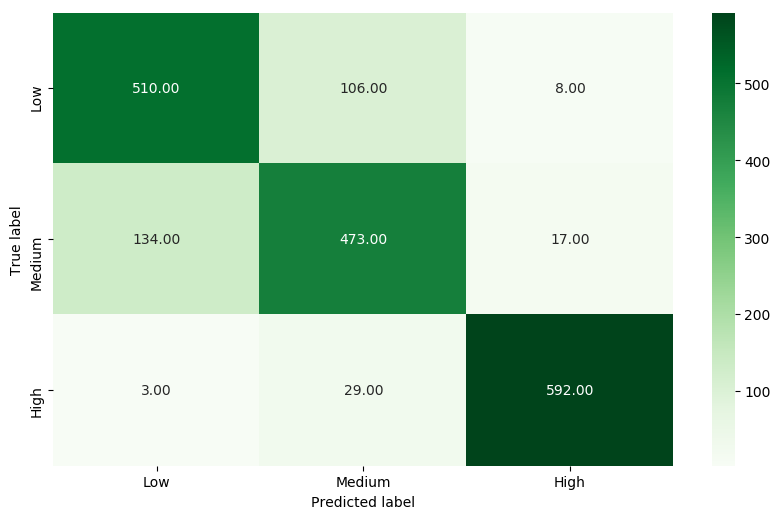

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize=(10,6),dpi=100)
draw_cm(y_test,y_pred)
plt.savefig('Confusion.png', dpi = 100)
plt.show()


In [46]:
xg.get_booster().get_score(importance_type="gain")

{'f24': 25.630981906437782,
 'f3': 4.245602930759185,
 'f17': 5.546735969987534,
 'f15': 4.084822648019388,
 'f18': 2.2863698836953574,
 'f1': 3.1993806393450623,
 'f11': 2.920169373028036,
 'f8': 18.99251326127157,
 'f28': 2.9802974506689788,
 'f5': 5.046594399057668,
 'f19': 1.6087287411858056,
 'f0': 4.168360798816126,
 'f14': 4.543074932283821,
 'f27': 9.343802257561293,
 'f12': 8.181915548873395,
 'f22': 1.566368666313985,
 'f21': 1.47286430960581,
 'f13': 2.0296154034661464,
 'f16': 2.1180649393378777,
 'f20': 1.3358441464914579,
 'f6': 2.2525525944598526,
 'f7': 6.612319292405504,
 'f25': 1.858768025820833,
 'f26': 2.2402270827020203,
 'f10': 2.0469441571446976,
 'f23': 1.5626820076204546,
 'f2': 3.8927211378645854,
 'f4': 5.049115255981446,
 'f9': 2.476764860695652}

In [47]:
sorted_idx = np.argsort(xg.feature_importances_)[::-1]

In [56]:
X.shape

(5844, 29)

In [48]:
sorted_idx

array([24,  8, 27, 12,  7, 17,  4,  5, 14,  3,  0, 15,  2,  1, 28, 11,  9,
       18,  6, 26, 16, 10, 13, 25, 19, 22, 23, 21, 20], dtype=int64)

In [63]:
for index in sorted_idx:
    print([train.columns[index], xg.feature_importances_[index]])

['Experience', 0.18400608]
['CollegeTier', 0.1363482]
['gapgrad', 0.06707962]
['CollegeCityTier', 0.058738377]
['12board', 0.04747017]
['Quant', 0.03982029]
['10board', 0.03624785]
['12graduation', 0.036229752]
['GraduationYear', 0.03261496]
['10percentage', 0.030479396]
['Designation', 0.029924868]
['English', 0.029325144]
['Gender', 0.027946038]
['JobCity', 0.022968512]
['Max_score', 0.021395704]
['collegeGPA', 0.020964041]
['Degree', 0.017780818]
['Domain', 0.016413962]
['12percentage', 0.016171185]
['AgeJ', 0.0160827]
['Logical', 0.0152056925]
['Specialization', 0.0146951135]
['CollegeState', 0.014570709]
['Age', 0.013344187]
['conscientiousness', 0.011549143]
['nueroticism', 0.011245038]
['openess_to_experience', 0.011218572]
['extraversion', 0.010573765]
['agreeableness', 0.009590091]


In [54]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,340.000000,27.000000,1.000000,74.600000,3.000000,2007.000000,81.600000,3.000000,2.000000,0.000000,2.000000,67.800000,0.000000,13.000000,2011.000000,440.000000,425.000000,415.000000,35.653649,-0.159000,0.212400,-1.065900,-0.487900,0.288900,5.000000,25.000000,21.000000,0.000000,465.000000
1,330.000000,14.000000,0.000000,58.000000,2.000000,2007.000000,59.000000,2.000000,2.000000,0.000000,4.000000,60.500000,0.000000,23.000000,2011.000000,425.000000,435.000000,365.000000,5.879280,0.510000,0.344800,-0.634300,0.649800,0.818300,1.000000,25.000000,25.000000,3.000000,200.000000
2,247.000000,68.000000,1.000000,75.520000,3.000000,2009.000000,70.000000,3.000000,2.000000,0.000000,8.000000,60.130000,0.000000,11.000000,2013.000000,485.000000,545.000000,530.000000,75.537512,-0.589900,-0.686700,0.135700,-1.248600,-0.460100,1.000000,24.000000,23.000000,0.000000,446.000000
3,275.731081,53.068286,1.000000,72.399039,1.318902,2006.000000,80.539388,3.000000,2.000000,0.000000,4.000000,65.171457,0.560366,11.207321,2010.000000,425.432946,366.207321,576.207321,95.262460,0.380834,-0.222741,-0.587983,0.391515,-0.869057,4.560366,25.560366,22.439634,1.439634,470.544527
4,347.425810,107.015675,0.541014,73.943243,2.541014,2006.458986,75.081662,2.541014,2.000000,0.000000,4.164054,75.603266,0.000000,23.000000,2011.458986,355.000000,505.820271,635.849793,85.016875,-0.103041,0.441994,-0.260615,-0.388470,-0.279763,4.541014,26.082027,23.000000,0.000000,522.539187
5,371.000000,93.000000,1.000000,72.120000,3.000000,2009.000000,78.000000,3.000000,2.000000,0.000000,4.000000,75.000000,0.000000,25.000000,2014.000000,420.000000,445.000000,740.000000,5.316031,-1.882500,0.045900,-0.143700,0.019200,-0.285900,1.000000,23.000000,23.000000,1.000000,415.000000
6,0.000000,14.000000,1.000000,85.400000,2.000000,2008.000000,88.700000,2.000000,2.000000,0.000000,4.000000,62.000000,0.000000,0.000000,2012.000000,455.000000,425.000000,545.000000,53.838689,0.741900,1.904800,-0.053700,0.003500,-0.287500,2.000000,23.000000,22.000000,1.000000,333.000000
7,340.000000,62.000000,1.000000,71.200000,3.000000,2009.000000,72.000000,3.000000,2.000000,0.000000,6.000000,76.900000,0.000000,23.000000,2014.000000,430.000000,530.000000,630.000000,99.674449,0.702700,1.044900,-0.604800,-0.234400,0.288900,1.000000,23.000000,22.000000,0.000000,645.000000
8,44.000000,45.000000,1.000000,87.000000,0.000000,2009.000000,68.000000,0.000000,2.000000,0.000000,4.000000,69.000000,0.000000,10.000000,2014.000000,475.000000,535.000000,765.000000,33.878635,1.851700,-1.619100,-1.373300,-1.248600,1.055400,1.000000,23.000000,23.000000,0.000000,305.000000
9,369.098243,14.000000,0.436608,74.608727,1.126784,2008.436608,74.451208,3.000000,2.000000,0.000000,2.873216,73.243458,1.000000,16.633919,2012.436608,529.366081,583.169595,566.620473,71.988793,0.385229,0.995247,0.388315,-0.442755,-0.276178,2.690176,24.000000,22.309824,0.436608,441.901757


# AdaBoost

In [128]:
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [129]:
ab = AdaBoostClassifier()
parameters = {
    'n_estimators': [5, 50,250, 500],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(ab, parameters, cv=5)
cv.fit(X_train,y_train)

print_results(cv)

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:171: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:171: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_su

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:171: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:171: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\Users\impra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
C:\Users\impra\Anaconda3\lib\si

BEST PARAMS: {'learning_rate': 1, 'n_estimators': 250}

0.56 (+/-0.017) for {'learning_rate': 0.01, 'n_estimators': 5}
0.564 (+/-0.022) for {'learning_rate': 0.01, 'n_estimators': 50}
0.649 (+/-0.04) for {'learning_rate': 0.01, 'n_estimators': 250}
0.681 (+/-0.034) for {'learning_rate': 0.01, 'n_estimators': 500}
0.56 (+/-0.017) for {'learning_rate': 0.1, 'n_estimators': 5}
0.685 (+/-0.036) for {'learning_rate': 0.1, 'n_estimators': 50}
0.737 (+/-0.066) for {'learning_rate': 0.1, 'n_estimators': 250}
0.758 (+/-0.089) for {'learning_rate': 0.1, 'n_estimators': 500}
0.635 (+/-0.045) for {'learning_rate': 1, 'n_estimators': 5}
0.736 (+/-0.091) for {'learning_rate': 1, 'n_estimators': 50}
0.767 (+/-0.138) for {'learning_rate': 1, 'n_estimators': 250}
0.766 (+/-0.143) for {'learning_rate': 1, 'n_estimators': 500}
0.269 (+/-0.065) for {'learning_rate': 10, 'n_estimators': 5}
0.269 (+/-0.065) for {'learning_rate': 10, 'n_estimators': 50}
0.138 (+/-0.028) for {'learning_rate': 10, 'n_estimator

In [42]:
ab = AdaBoostClassifier(learning_rate= 0.1,n_estimators = 100)

In [43]:
ab.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)

In [44]:
y_pred = ab.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.6829405162738497

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       594
           1       0.54      0.64      0.59       594
           2       0.84      0.68      0.75       594

    accuracy                           0.68      1782
   macro avg       0.70      0.68      0.69      1782
weighted avg       0.70      0.68      0.69      1782



## Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression

In [173]:
LR = LogisticRegression(multi_class='multinomial',solver ='newton-cg')

In [174]:
LR.fit(X_train,y_train)

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
y_pred = LR.predict(X_test)

In [176]:
accuracy_score(y_test,y_pred)

0.6571268237934904

In [177]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       594
           1       0.54      0.67      0.60       594
           2       0.76      0.53      0.63       594

    accuracy                           0.66      1782
   macro avg       0.67      0.66      0.66      1782
weighted avg       0.67      0.66      0.66      1782

